SMS/EMAIL SPAM DETECTION USING NAIVE BAYES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("spam.csv",encoding = "latin1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
4336,ham,on a Tuesday night r u 4 real
2401,spam,Babe: U want me dont u baby! Im nasty and have...
4258,ham,Sad story of a Man - Last week was my b'day. M...
4865,ham,"Oh! Shit, I thought that was your trip! Looooo..."
1318,ham,Ok...


In [ ]:
df.rename(columns={"v1":"message_type","v2":"message"},inplace=True)
df.sample(5)

,message_type,message
2752,ham,Sat right? Okay thanks...
2959,ham,Sir send to group mail check it.
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
2875,ham,Fuck cedar key and fuck her (come over anyway ...
408,ham,Headin towards busetop


As this is a classification problem we want the message_type should be binary classified.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["message_type"] = encoder.fit_transform(df["message_type"])
df["message_type"].sample(5)

2279    0
4769    0
4029    0
4638    0
1420    0
Name: message_type, dtype: int64

In [ ]:
df[df["message_type"]==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


**CHECKING THE MISSING VALUE**

In [ ]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
# To remove the 403 duplicate value we have to drop them.
df = df.drop_duplicates(keep ="first")

**EXPLORATORY DATA ANALYSIS - (EDA)**

In [ ]:
df["message_type"].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

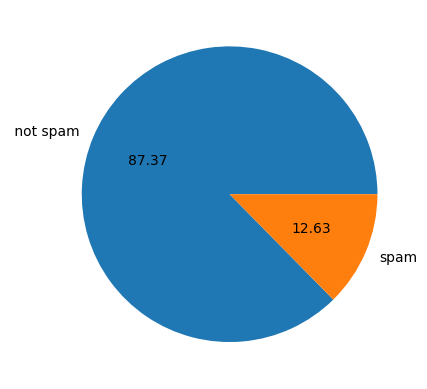

In [ ]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [ ]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# For a number of words
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [ ]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
466,0,They don't put that stuff on the roads to keep...,83,18
5223,0,If I die I want u to have all my stuffs.,40,12
4338,0,Just got outta class gonna go gym.,34,9
127,0,Are you there in room.,22,6
4109,0,"Yo, you gonna still be in stock tomorrow/today...",75,18


In [ ]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

**FOR HAM MESSAGES**

In [ ]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**FOR SPAM MESSAGES**

In [ ]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Here we can understand that the "SPAM"
messages are longer than while comparing to "HAM" messges

<Axes: xlabel='num_characters', ylabel='Count'>

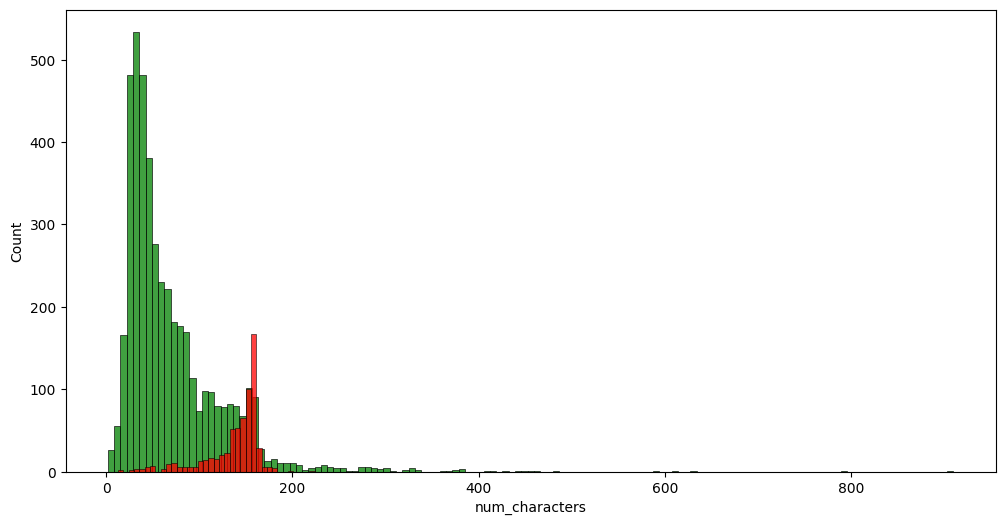

In [ ]:
# For Characters.
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

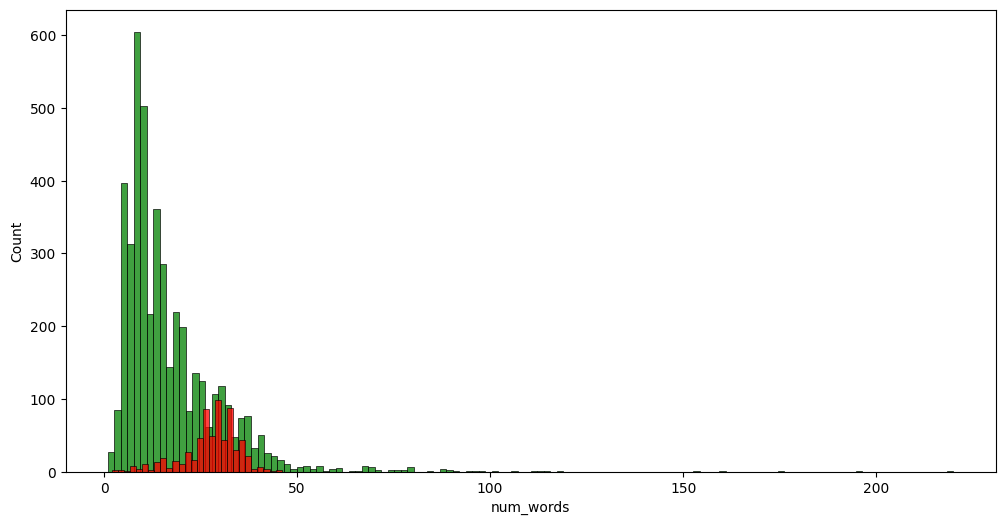

In [ ]:
# For Words.
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

In [ ]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    #now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [ ]:
# Applying the text_transform function to all the message in the dataset.
df['transformed_msg']=df['message'].apply(text_transform)

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

**FOR SPAM**

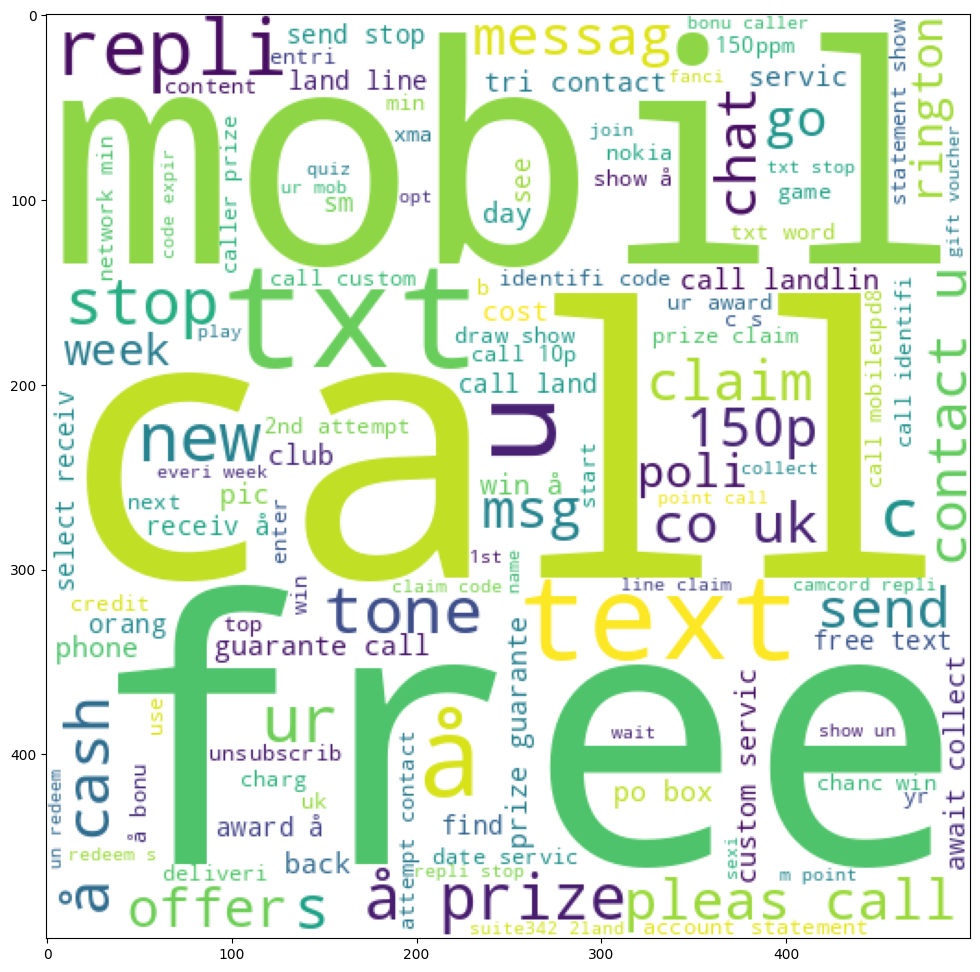

In [ ]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

**FOR HAM**

In [ ]:
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

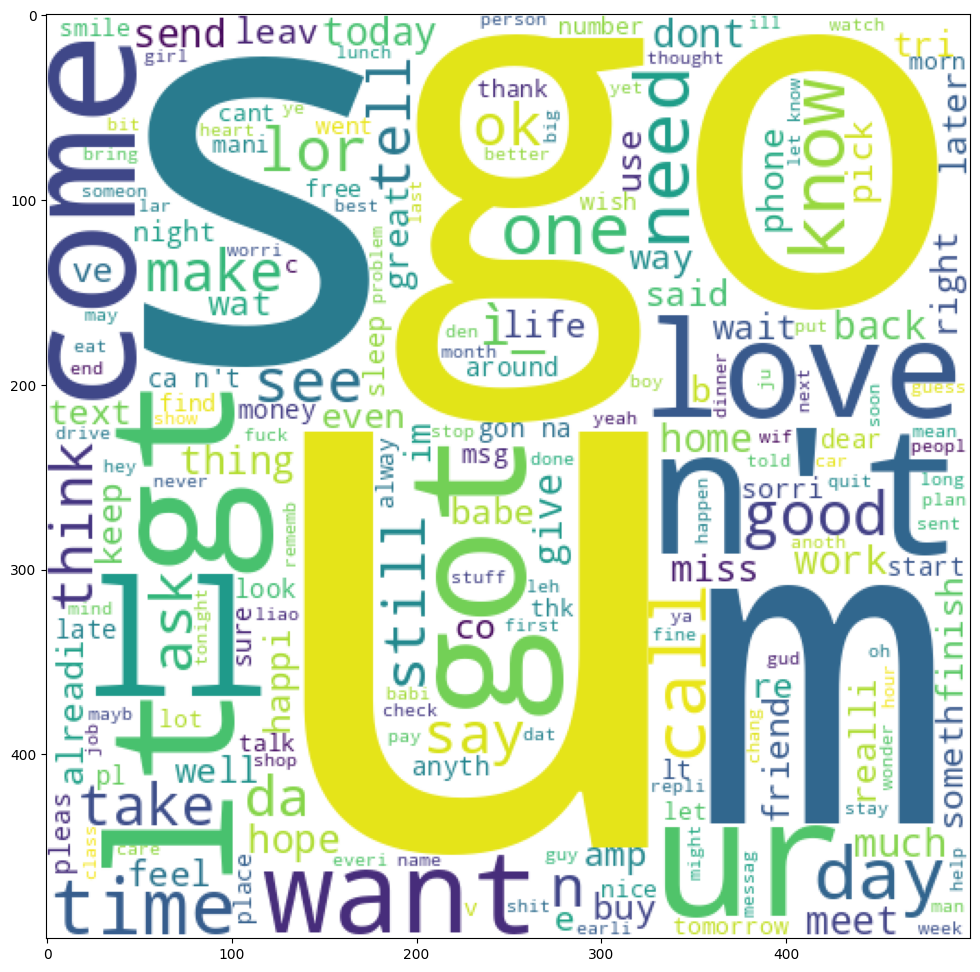

In [ ]:
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)



*   We will be drawnn inside the WordCloud we will find out top 30 in both Ham as well as Spam messages.




In [ ]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         '2005.': 1,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         "'s": 59,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         "'d": 2,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'å£1.50': 14,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1

In [ ]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ("'s", 59),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45)]

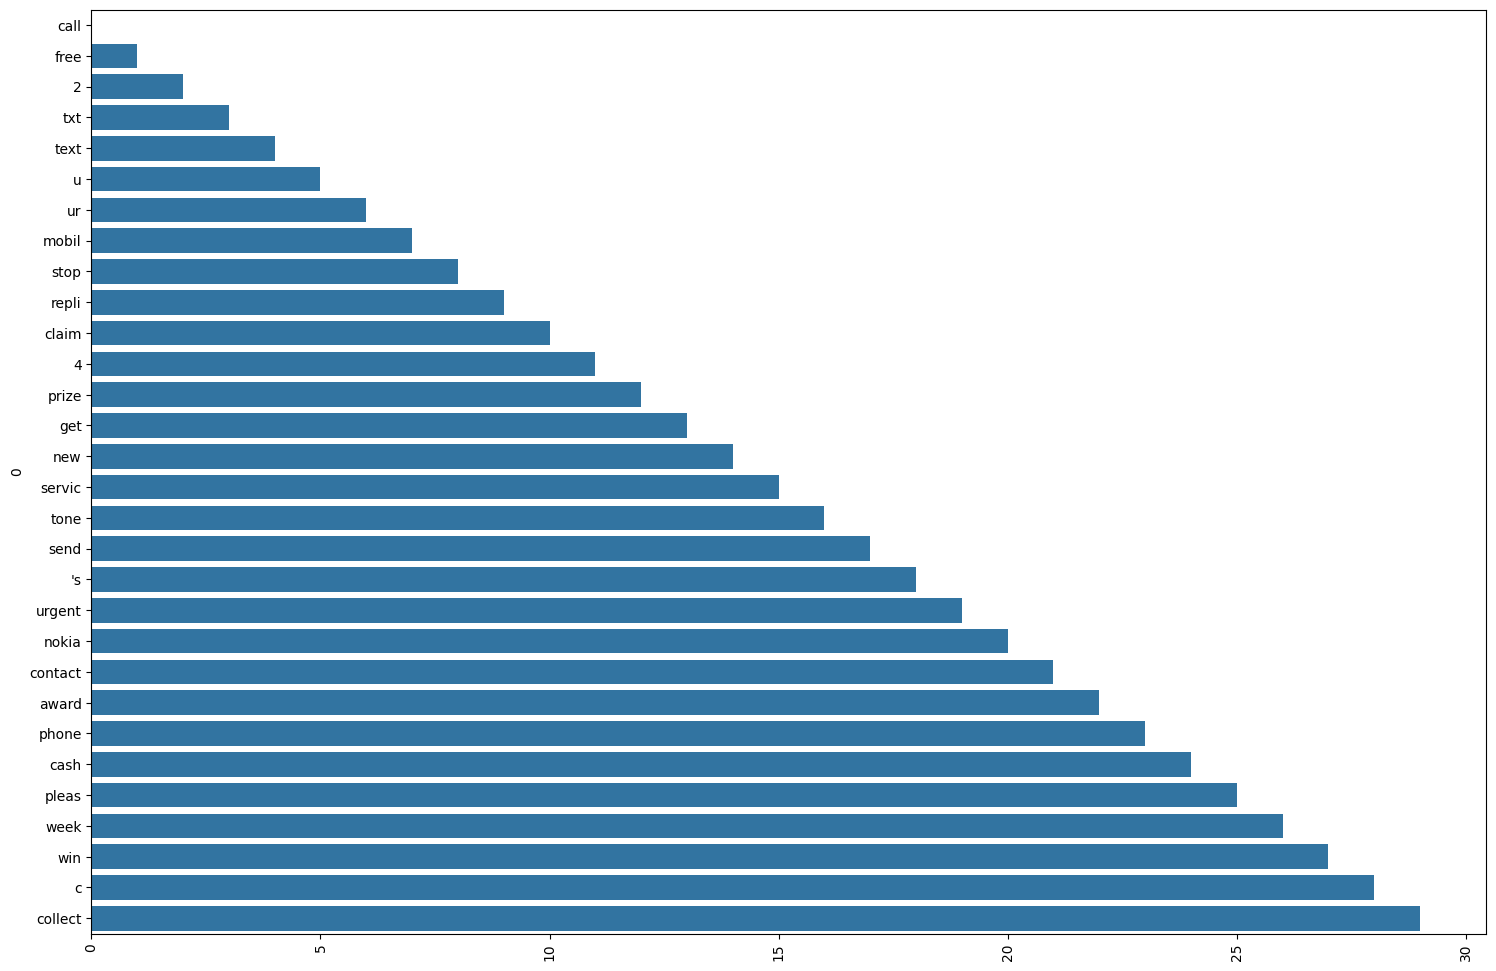

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

**BUILDING A MODEL USING NAIVE BAYES**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

Find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes

In [ ]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0




* The precision comes out to be 1 which proves very good for our model as there will be no FALSE POSITIVES.




In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of the Bernoulli NB is 1.0
